#### Download the dataset from [here](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310007901) 

#### <u>About the dataset</u>

This dataset is published by statistics canada
#### <u>References </u>

Statistics Canada. Table 23-10-0079-01  Operating and financial statistics for major Canadian airlines, monthly

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
df = pd.read_csv('dataset/dataset.csv')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4634 entries, 0 to 4633
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   REF_DATE                              4634 non-null   object 
 1   GEO                                   4634 non-null   object 
 2   DGUID                                 4634 non-null   object 
 3   Operational and financial statistics  4634 non-null   object 
 4   UOM                                   4634 non-null   object 
 5   UOM_ID                                4634 non-null   int64  
 6   SCALAR_FACTOR                         4634 non-null   object 
 7   SCALAR_ID                             4634 non-null   int64  
 8   VECTOR                                4634 non-null   object 
 9   COORDINATE                            4634 non-null   float64
 10  VALUE                                 4105 non-null   float64
 11  STATUS           

In [149]:
df

,REF_DATE,GEO,DGUID,Operational and financial statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.10,1895.0,NaN,NaN,NaN,0
1,1981-01,Canada,2021A000011124,Passenger-kilometres,Number,223,thousands,3,v11744,1.20,3411545.0,NaN,NaN,NaN,0
2,1981-01,Canada,2021A000011124,Kilograms of goods,Kilograms,192,thousands,3,v11745,1.30,29091.0,NaN,NaN,t,0
3,1981-01,Canada,2021A000011124,Goods tonne-kilometres,Tonne-kilometres,285,thousands,3,v11746,1.40,64084.0,NaN,NaN,t,0
4,1981-01,Canada,2021A000011124,Hours flown,Number,223,thousands,3,v11747,1.50,53.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4629,2025-10,Canada,2021A000011124,Available seat-kilometres,Number,223,thousands,3,v107645152,1.10,23523454.0,NaN,NaN,NaN,0
4630,2025-10,Canada,2021A000011124,Load factor,Percent,239,units,0,v107645153,1.11,83.3,NaN,NaN,NaN,1
4631,2025-10,Canada,2021A000011124,Hours flown,Number,223,thousands,3,v11747,1.50,183.0,NaN,NaN,NaN,0
4632,2025-10,Canada,2021A000011124,Turbo fuel consumed,Litres,203,thousands,3,v11748,1.60,643354.0,NaN,NaN,NaN,0


In [150]:
df = df[df["Operational and financial statistics"] == "Passengers"].reset_index(drop= True)
df["PASSENGERS"] = df["VALUE"] * 1000
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])
df = df.sort_values("REF_DATE")
df = df.set_index("REF_DATE")

In [151]:
df

,GEO,DGUID,Operational and financial statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,PASSENGERS
REF_DATE,,,,,,,,,,,,,,,
1981-01-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,1895.0,NaN,NaN,NaN,0,1895000.0
1981-02-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,1852.0,NaN,NaN,NaN,0,1852000.0
1981-03-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2130.0,NaN,NaN,NaN,0,2130000.0
1981-04-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2083.0,NaN,NaN,NaN,0,2083000.0
1981-05-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,2118.0,NaN,NaN,NaN,0,2118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,7546.0,NaN,NaN,NaN,0,7546000.0
2025-07-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,8295.0,NaN,NaN,NaN,0,8295000.0
2025-08-01,Canada,2021A000011124,Passengers,Number,223,thousands,3,v11743,1.1,8136.0,NaN,NaN,NaN,0,8136000.0


In [152]:
df.drop(['GEO', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'Operational and financial statistics', 'SCALAR_FACTOR', 'VALUE'],  axis=1, inplace=True)

In [153]:
df

,PASSENGERS
REF_DATE,
1981-01-01,1895000.0
1981-02-01,1852000.0
1981-03-01,2130000.0
1981-04-01,2083000.0
1981-05-01,2118000.0
...,...
2025-06-01,7546000.0
2025-07-01,8295000.0
2025-08-01,8136000.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 1981-01-01 to 2025-10-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PASSENGERS  538 non-null    float64
dtypes: float64(1)
memory usage: 8.4 KB


In [155]:
df.isna().sum()

PASSENGERS    0
dtype: int64

In [156]:
df.index.is_monotonic_increasing

True

In [157]:
df["PASSENGERS"].describe()

count    5.380000e+02
mean     3.112251e+06
std      1.899489e+06
min      2.130000e+05
25%      1.825750e+06
50%      2.208000e+06
75%      3.489000e+06
max      8.463000e+06
Name: PASSENGERS, dtype: float64

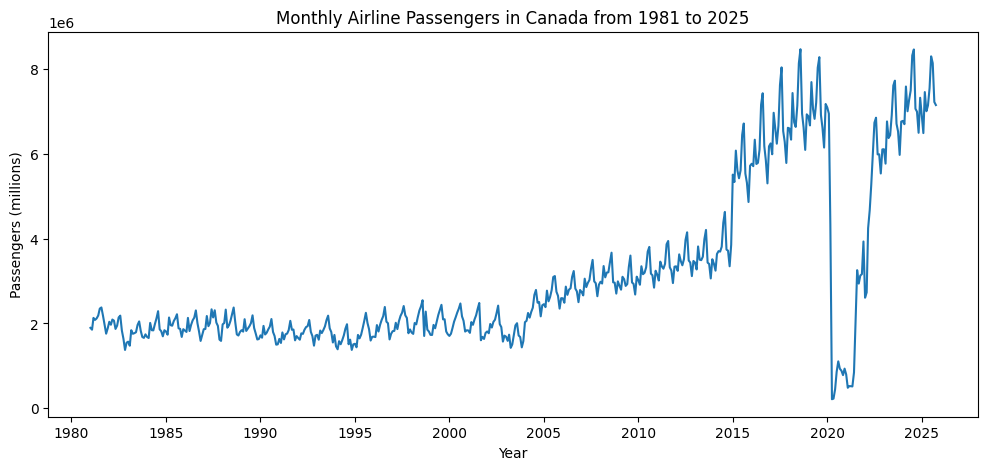

In [169]:
plt.figure(figsize= (12, 5))
plt.plot(df.index, df["PASSENGERS"])
plt.title("Monthly Airline Passengers in Canada from 1981 to 2025")
plt.xlabel("Year")
plt.ylabel("Passengers (millions)")
plt.show()